# National Trends Visualizations
### By: Madison Roberts
This jupyter notebook file is dedicated towards the U.S. Commodity Flow Data Mining Project. The code featured in this file is focused on investigating what the data could tell us about the national trends.

In [19]:
!pip uninstall seaborn matplotlib pandas -y

!pip install seaborn matplotlib pandas


Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: matplotlib 3.10.7
Uninstalling matplotlib-3.10.7:
  Successfully uninstalled matplotlib-3.10.7
Found existing installation: pandas 2.3.3
Uninstalling pandas-2.3.3:
  Successfully uninstalled pandas-2.3.3
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [seaborn]m2/3 [seaborn]ib]


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df =  pd.read_csv('Data files/comodity2017.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Data files/comodity2017.csv'

In [ ]:
df.head

<bound method NDFrame.head of          SHIPMT_ID  ORIG_STATE  ORIG_MA ORIG_CFS_AREA  DEST_STATE  DEST_MA  \
0                1           6    99999      06-99999           6      260   
1                2          49      482        49-482          47      314   
2                3           6      348        06-348           6      348   
3                4           6      260        06-260           6    99999   
4                5          45      273        45-273          45      273   
...            ...         ...      ...           ...         ...      ...   
1048570    1048571          40      538        40-538          40      416   
1048571    1048572          51    40060      51-40060          24    99999   
1048572    1048573          48      206        48-206           8      216   
1048573    1048574          36    99999      36-99999          42    99999   
1048574    1048575          54    99999      54-99999          54    99999   

        DEST_CFS_AREA  NAICS  QUA

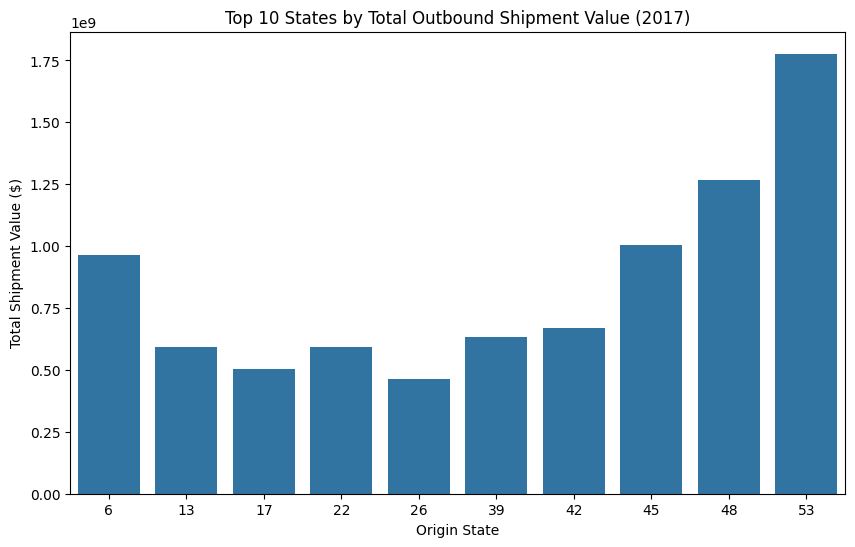

In [ ]:
#Top States by Total Shipment Value (Outbound Shipment Value)
state_value = df.groupby("ORIG_STATE")["SHIPMT_VALUE"].sum().reset_index()
state_value = state_value.sort_values("SHIPMT_VALUE", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=state_value, x="ORIG_STATE", y="SHIPMT_VALUE")
plt.title("Top 10 States by Total Outbound Shipment Value (2017)")
plt.xlabel("Origin State")
plt.ylabel("Total Shipment Value ($)")
plt.show()

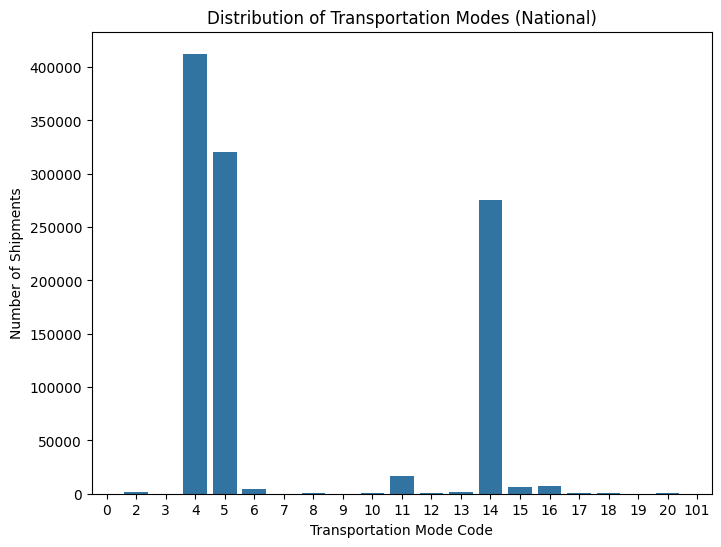

In [ ]:
#Transportation Mode Distribution
mode_counts = df["MODE"].value_counts().reset_index()
mode_counts.columns = ["MODE", "COUNT"]

plt.figure(figsize=(8,6))
sns.barplot(data=mode_counts, x="MODE", y="COUNT")
plt.title("Distribution of Transportation Modes (National)")
plt.xlabel("Transportation Mode Code")
plt.ylabel("Number of Shipments")
plt.show()

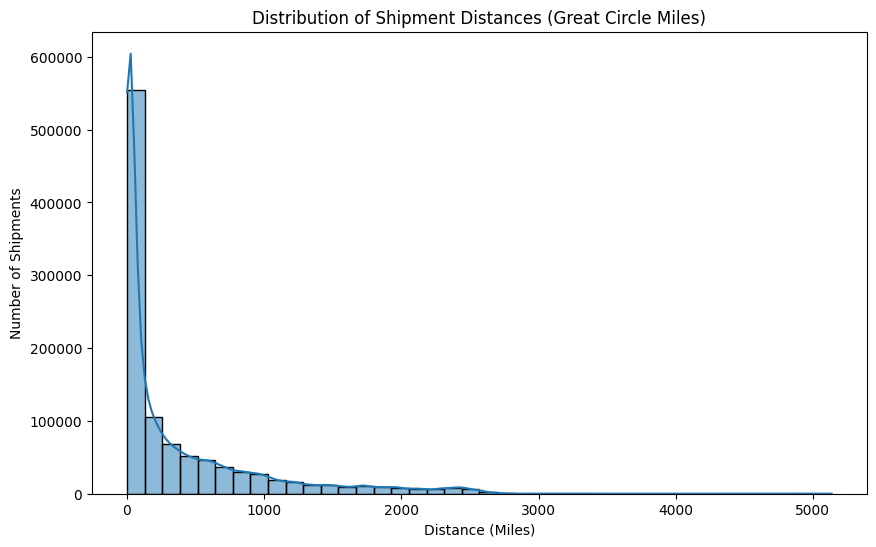

In [ ]:
#Shipment Distance Distribution
plt.figure(figsize=(10,6))
sns.histplot(df["SHIPMT_DIST_GC"], bins=40, kde=True)
plt.title("Distribution of Shipment Distances (Great Circle Miles)")
plt.xlabel("Distance (Miles)")
plt.ylabel("Number of Shipments")
plt.show()

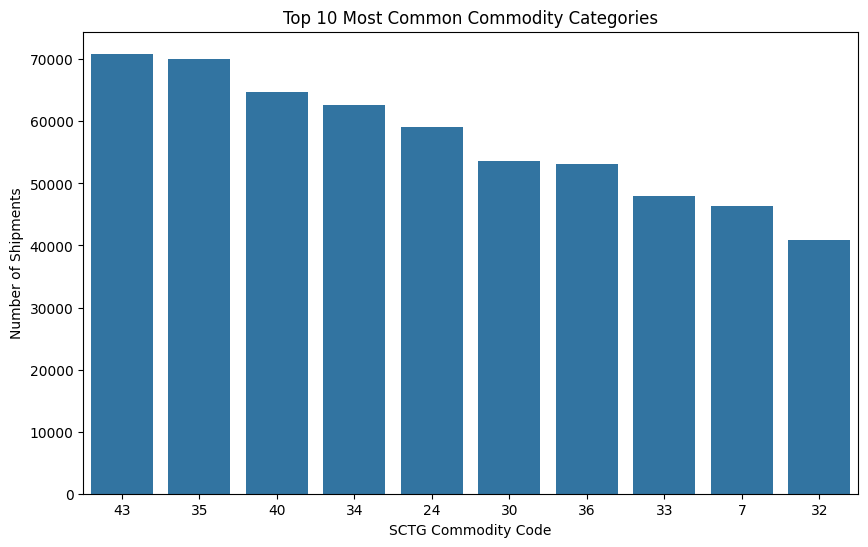

In [ ]:
# Top Commodity Categories by Shipment Count
sctg_counts = df["SCTG"].value_counts().reset_index()
sctg_counts.columns = ["SCTG", "COUNT"]
sctg_counts = sctg_counts.head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=sctg_counts, x="SCTG", y="COUNT")
plt.title("Top 10 Most Common Commodity Categories")
plt.xlabel("SCTG Commodity Code")
plt.ylabel("Number of Shipments")
plt.show()


# North Carolina Trend Visualizations
### By: Nathan To

This notebook looks at shipping data for North Carolina and breaks down what kinds of products are being moved, how much is being shipped, and the overall trends we can see. The goal is to understand what the data actually says about North Carolina and how it compares to the bigger national picture. To do this, I cleaned the data, filtered it to only include North Carolina shipments, and created a few visuals to make the patterns easier to see. This helps show which products matter the most to the state and gives a clearer idea of how North Carolina fits into the larger supply chain.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Data Files/comodity2017.csv", low_memory=False)

nc = df[df["ORIG_STATE"] == 37].copy()

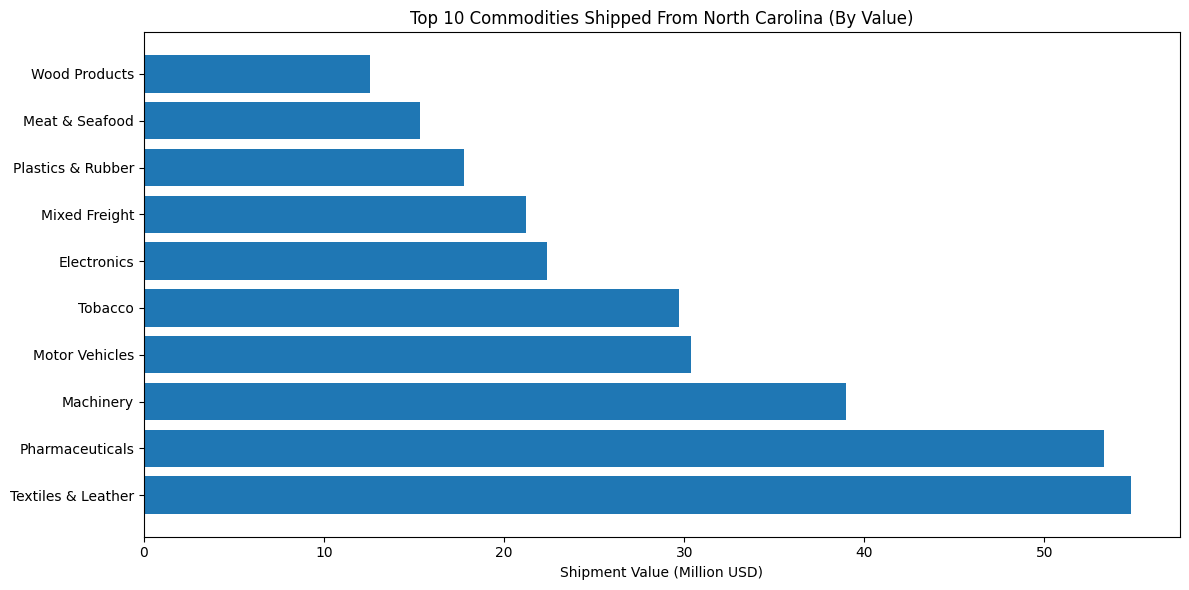

In [33]:
nc["SCTG"] = nc["SCTG"].astype(str).str.zfill(2)

# Find top 10 commodity categories by shipment value
top = nc.groupby("SCTG")["SHIPMT_VALUE"].sum().sort_values(ascending=False).head(10)


# Create chart
plt.figure(figsize=(12,6))
plt.barh(labels, top.values / 1_000_000)
plt.title("Top 10 Commodities Shipped From North Carolina (By Value)")
plt.xlabel("Shipment Value (Million USD)")
plt.tight_layout()
plt.show()

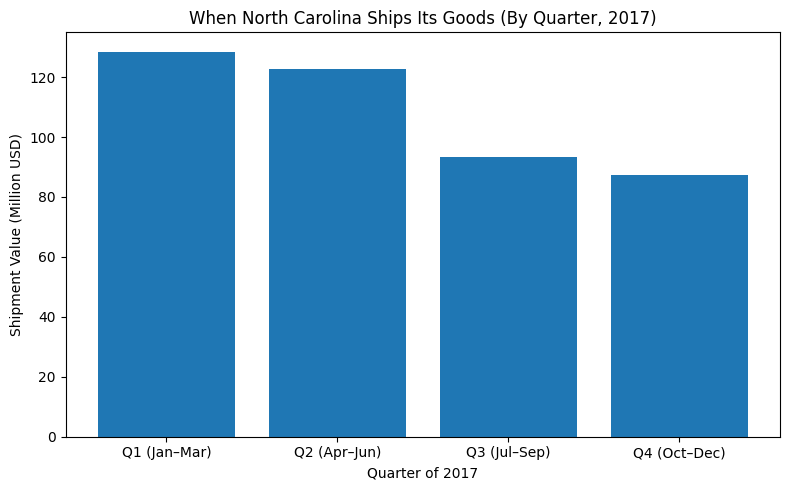

In [34]:
quarter_totals = (
    nc.groupby("QUARTER")["SHIPMT_VALUE"]
      .sum()
      .sort_index()
)

labels = ["Q1 (Jan–Mar)", "Q2 (Apr–Jun)", "Q3 (Jul–Sep)", "Q4 (Oct–Dec)"]

plt.figure(figsize=(8,5))
plt.bar(labels, quarter_totals.values / 1_000_000)
plt.title("When North Carolina Ships Its Goods (By Quarter, 2017)")
plt.xlabel("Quarter of 2017")
plt.ylabel("Shipment Value (Million USD)")
plt.tight_layout()
plt.show()

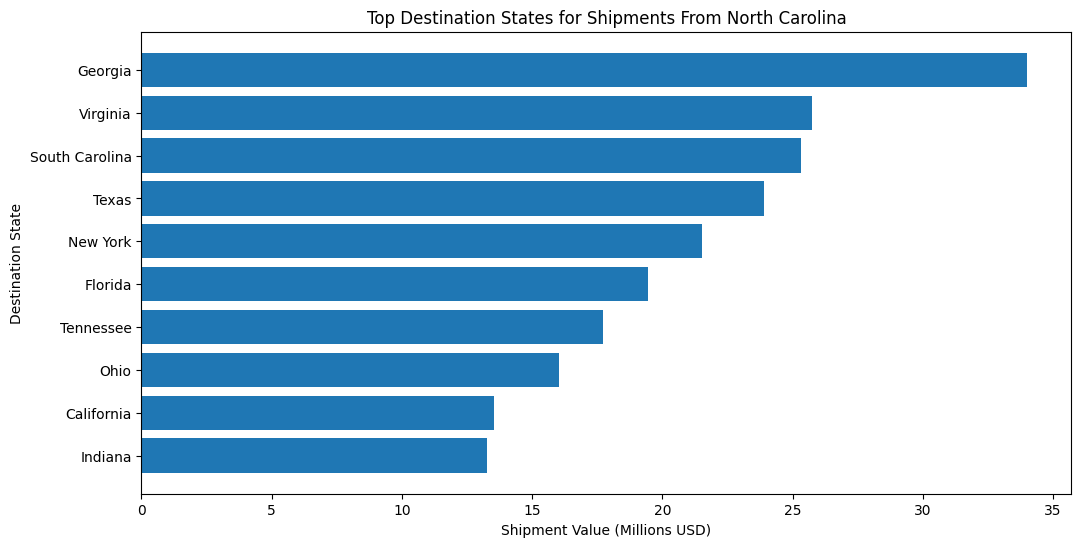

In [35]:
state_names = {
    "06": "California",
    "13": "Georgia",
    "51": "Virginia",
    "45": "South Carolina",
    "48": "Texas",
    "36": "New York",
    "12": "Florida",
    "47": "Tennessee",
    "39": "Ohio",
    "18": "Indiana"
}

# extract state code
nc["DEST_CODE"] = nc["DEST_CFS_AREA"].str[:2]

# map names
nc["DEST_STATE_NAME"] = nc["DEST_CODE"].map(state_names)

# remove NC -> NC
nc_filtered = nc[nc["DEST_STATE"] != 37]

top = (
    nc_filtered.groupby("DEST_STATE_NAME")["SHIPMT_VALUE"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
plt.barh(top.index, top.values / 1_000_000)
plt.title("Top Destination States for Shipments From North Carolina")
plt.xlabel("Shipment Value (Millions USD)")
plt.ylabel("Destination State")
plt.gca().invert_yaxis()
plt.show()

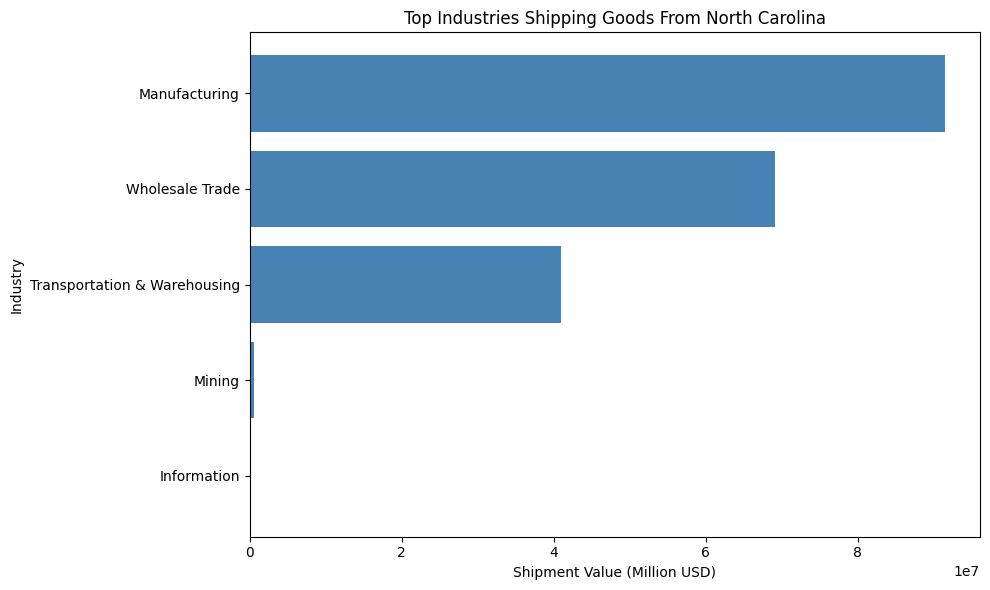

In [36]:
nc["NAICS_2"] = nc["NAICS"].astype(str).str[:2].astype(int)
nc["Industry"] = nc["NAICS_2"].map(industry_map)

# Group industries and sort largest to smallest
industry_totals = (
    nc.groupby("Industry")["SHIPMT_VALUE"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
plt.barh(industry_totals.index, industry_totals.values, color="steelblue")
plt.gca().invert_yaxis()   # THIS FLIPS THE ORDER (largest at top)

plt.title("Top Industries Shipping Goods From North Carolina")
plt.xlabel("Shipment Value (Million USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

## 